---
first we'll crop the images and save them in `processed-images/`

---

In [1]:
import os
from PIL import Image

card_width = 352
card_height = 550
input_directory = 'card-images'
output_directory = 'cropped-images'
if not os.path.exists(output_directory):
  os.makedirs(output_directory)

for filename in os.listdir(input_directory):
  input_path = os.path.join(input_directory, filename)
  image = Image.open(input_path)
  cropped_image = image.crop((0, 0, card_width, card_height))
  output_path = os.path.join(output_directory, filename)
  cropped_image.save(output_path)

---
now we'll apply a set of rotations to each image

---

In [4]:
import random


input_directory = 'cropped-images'
output_directory = 'rotated-images'
if not os.path.exists(output_directory):
  os.makedirs(output_directory)

number_of_rotations = 8
random.seed(2)
# Capture the output dimensions of the largest images --
# we'll later make all images this size.
largest_width, largest_height = 0, 0
for filename in os.listdir(input_directory):
  params = {
    'number': filename.split('-')[0],
    'color': filename.split('-')[1],
    'texture': filename.split('-')[2],
    'shape': filename.split('-')[3].split('.')[0],
  }
  input_path = os.path.join(input_directory, filename)
  image = Image.open(input_path)
  for _ in range(number_of_rotations):
    rotation = random.choice(range(0, 360))
    params['rotation'] = rotation
    rotated_image = image.rotate(rotation, expand=True, resample=Image.BICUBIC)
    new_filename = '%s-%s-%s-%s-%s.png' % (
      params['number'], params['color'], params['texture'], params['shape'], rotation)
    output_path = os.path.join(output_directory, new_filename)
    rotated_image.save(output_path)
    if rotated_image.width > largest_width:
      largest_width = rotated_image.width
    if rotated_image.height > largest_height:
      largest_height = rotated_image.height

---
make sure each image is the same size

---

In [17]:
input_directory = 'rotated-images'
output_directory = 'equally-sized-images'
if not os.path.exists(output_directory):
  os.makedirs(output_directory)
  
for filename in os.listdir(input_directory):
  input_path = os.path.join(input_directory, filename)
  output_path = os.path.join(output_directory, filename)
  image = Image.open(input_path)
  if image.width < largest_width or image.height < largest_height:
    new_image = Image.new('RGB', (largest_width, largest_height), (0, 0, 0))
    left_padding = (largest_width - image.width) / 2
    top_padding = (largest_height - image.height) / 2
    new_image.paste(image, (left_padding, top_padding))
    new_image.save(output_path)
  else:
    image.save(output_path)

---
let's display a few

---

2-red-solid-diamond-132.png, size: (654, 654)


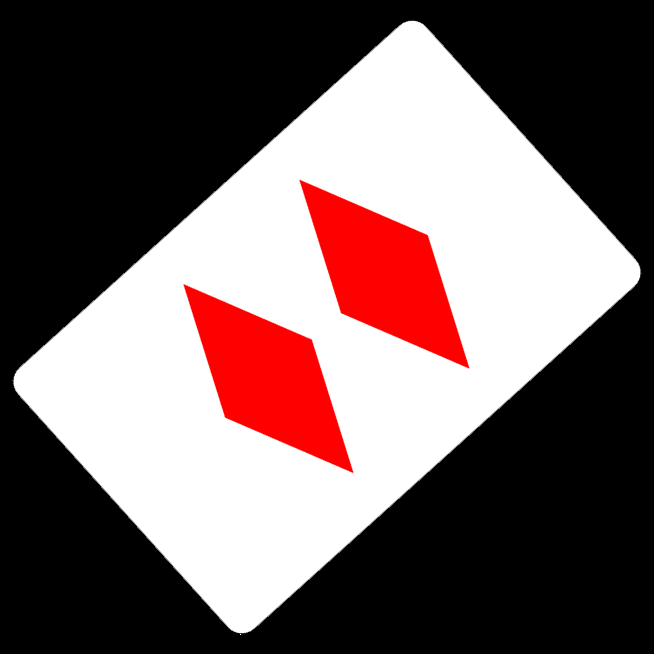

3-green-solid-bean-73.png, size: (654, 654)


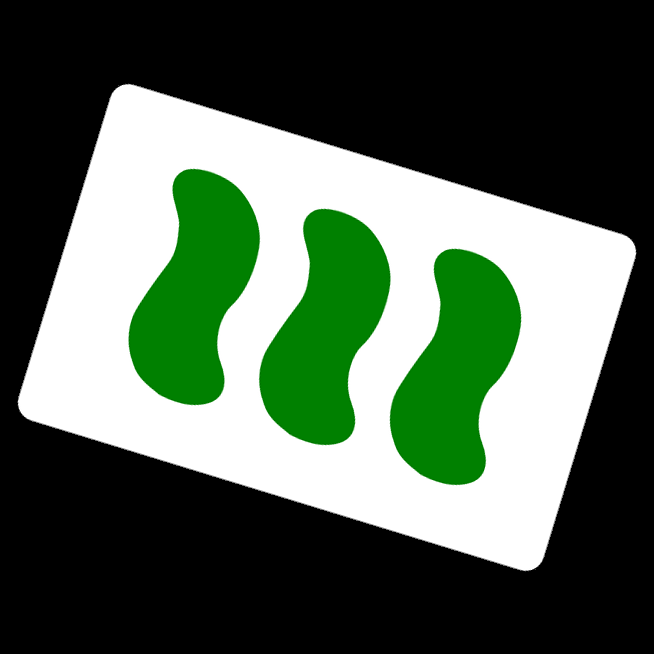

2-green-striped-diamond-51.png, size: (654, 654)


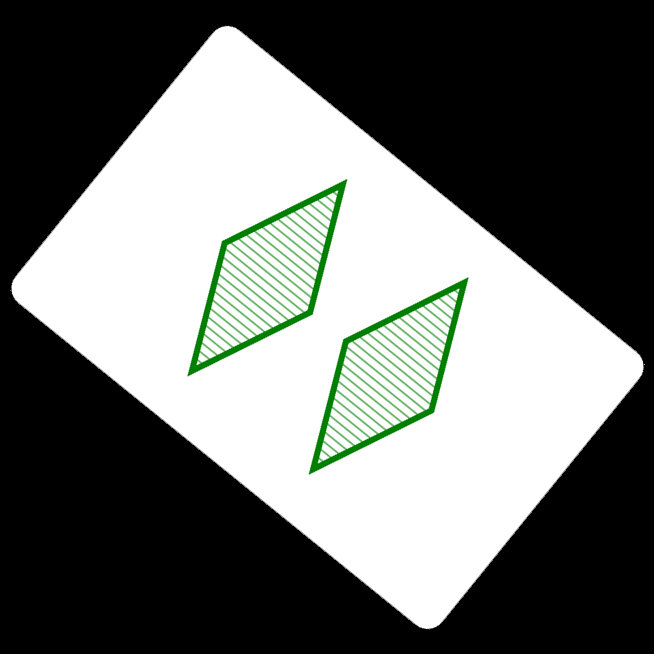

In [18]:
from IPython import display


images = random.sample(os.listdir(output_directory), 3)
for filename in images:
  path = os.path.join(output_directory, filename)
  print '%s, size: %s' % (filename, Image.open(path).size)
  display.display(display.Image(filename=path))

---
these images are 638 x 638..kinda large -- let's shrink them

---

In [19]:
input_directory = 'equally-sized-images'
output_directory = 'resized-images'
if not os.path.exists(output_directory):
  os.makedirs(output_directory)
  
width, height = 150, 150

for filename in os.listdir(input_directory):
  input_path = os.path.join(input_directory, filename)
  image = Image.open(input_path)
  resized_image = image.resize((width, height), resample=Image.ANTIALIAS)
  output_path = os.path.join(output_directory, filename)
  resized_image.save(output_path)

---
and now let's see what our images look like

---

2-red-solid-diamond-132.png, size: (150, 150)


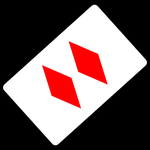

3-green-solid-bean-73.png, size: (150, 150)


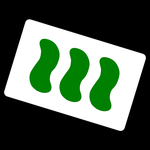

2-green-striped-diamond-51.png, size: (150, 150)


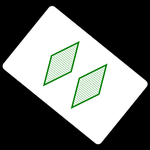

In [20]:
for filename in images:
  path = os.path.join(output_directory, filename)
  print '%s, size: %s' % (filename, Image.open(path).size)
  display.display(display.Image(filename=path))

---
let's also create a greyscaled versions of these images -- some classifiers will use RGB images, others don't need the color data

---

In [21]:
input_directory = 'resized-images'
output_directory = 'greyscaled-images'
if not os.path.exists(output_directory):
  os.makedirs(output_directory)

for filename in os.listdir(input_directory):
  input_path = os.path.join(input_directory, filename)
  image = Image.open(input_path)
  greyscaled_image = image.convert('L')
  output_path = os.path.join(output_directory, filename)
  greyscaled_image.save(output_path)

---
and let's view them

---

2-red-solid-diamond-132.png


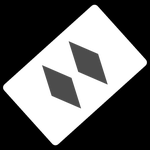

3-green-solid-bean-73.png


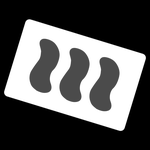

2-green-striped-diamond-51.png


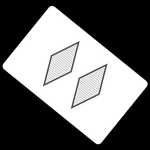

In [22]:
for filename in images:
  path = os.path.join(output_directory, filename)
  print filename
  display.display(display.Image(filename=path))